# This notebook
 * Generates masks based on noiselevel ratios

In [4]:
import numpy as np
import healpy as hp
import os, sys
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.gridspec as gridspec

import component_separation.MSC.MSC.pospace as ps

from lerepi.config.config_helper import data_functions as df

from lerepi.config.cmbs4.data import data_08d as sims_if
sims  = sims_if.ILC_May2022('00')

simids = np.array([0])
nside = 2048
lmax = 2047
lmax_plot = lmax

ll = np.arange(0,lmax_plot+1,1)
binspace = 5
scale_uk = (2 * ll + 1) * ll**2 * (ll + 1)**2
scale_ps = ll*(ll+1)/(2*np.pi)
label_scale_ps = r'$\frac{\ell(\ell+1)}{2 \pi}$'
label_scale_lp = r'$\frac{\ell^2(\ell+1)^2}{2 \pi}$'
scale_lp = ll**2 * (ll + 1)**2 * 1e7 / (2 * np.pi)

psl = r'$\frac{l(l+1)}{2\pi}C_\ell \/ [\mu K^2]$'

In [2]:
def bandpass_alms(alms, lmin, lmax=None):
    """
    lmin: minimum multipole to keep in alms
    lmax: maximimum multipole to keep in alms
    """
    
    if len(alms) == 3:
        out = np.zeros(alms.shape, dtype=complex)
        for idx, _alms in enumerate(alms):
            out[idx] = bandpass_alms(_alms, lmin, lmax=lmax)
        return out
    
    lmax_in_alms = hp.Alm.getlmax(len(alms))
    if lmax is None:
        lmax = lmax_in_alms
    else:
        assert isinstance(lmax, int), "lmax should be int: {}".format(lmax)
        assert lmax <= lmax_in_alms, "lmax exceeds lmax in alms: {} > {}".format(lmax, lmax_in_alms)
    
    fl = np.zeros(lmax_in_alms + 1, dtype=float)
    fl[lmin:lmax+1] = 1
    
    return hp.almxfl(alms, fl)

setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


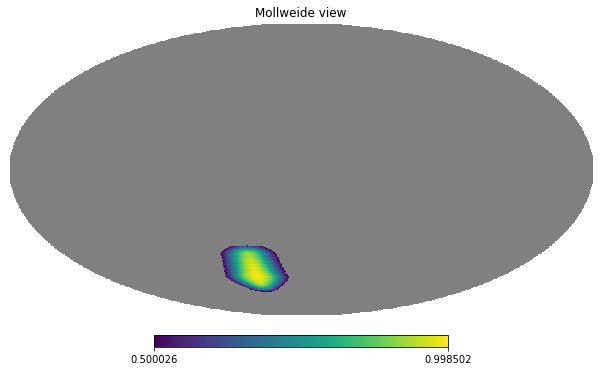

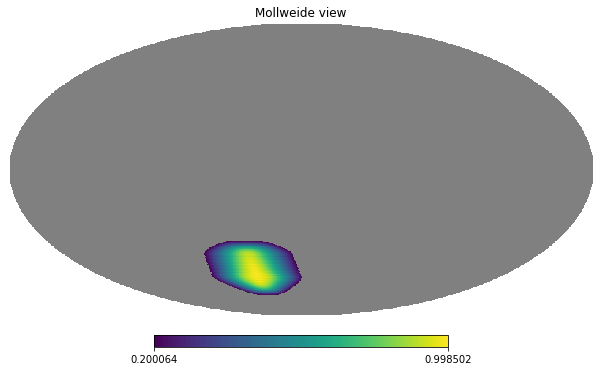

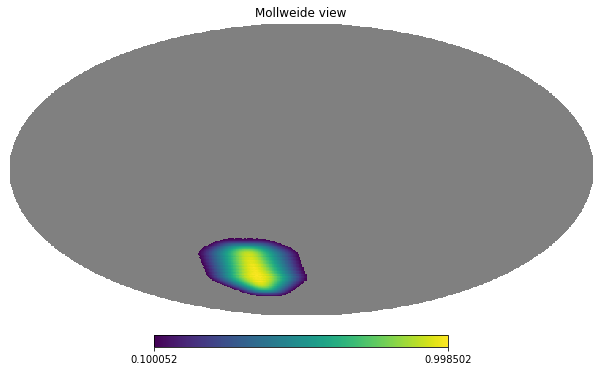

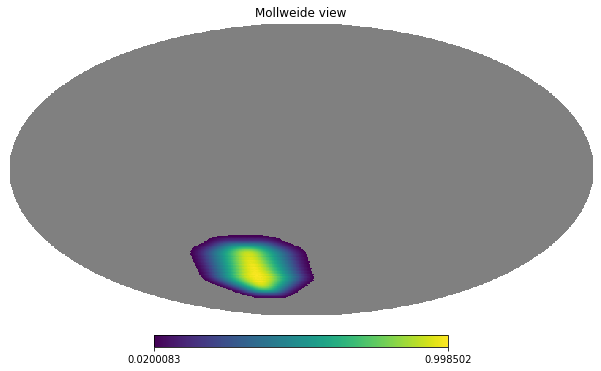

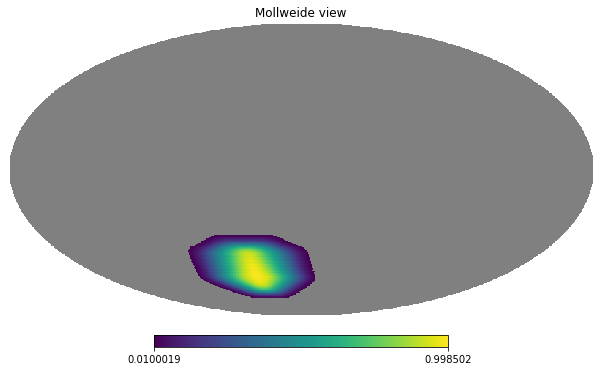

In [7]:
base_mask = '/global/project/projectdirs/cmbs4/awg/lowellbb/reanalysis/mapphi_intermediate/s08b/masks/08b_rhits_positive_nonan.fits'
for n in [2,5,10,50,100]:
    mask = df.get_nlev_mask(n, hp.read_map(base_mask))
    # mask = sc.get_nlev_mask(n)
    hp.mollview(np.where(mask==0,np.nan,mask))
    hp.write_map('/global/homes/s/sebibel/git/lerepi/lerepi/config/cmbs4/data/masks/08b_mask_r%s.fits'%n, mask)

In [ ]:
rhits_08d_cleaned = np.nan_to_num(np.where(rhits_08d>0,rhits_08d,0))
hp.write_map('/global/cscratch1/sd/sebibel/cmbs4/08d_rhits_positive_nonan.fits',rhits_08d_cleaned)